# DecisionTree

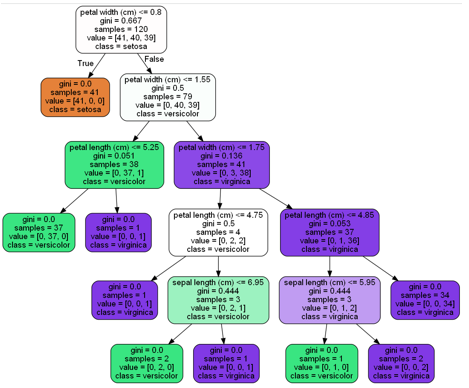

### 1. 개념

- ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘
- 데이터에 있는 규칙을 학습을 통해 찾아내 트리 기반의 분류 규칙을 만드는 것

### 2. 과적합
- 규칙을 너무 많이 만들면, 분류를 결정하는 방식이 복잡해지며, 과적합이 발생할 수 있음

### 3. 트리 성능 최적화
- 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함
    - 최대한 균일한 데이터 세트를 구성할 수 있도록 분할 필요
    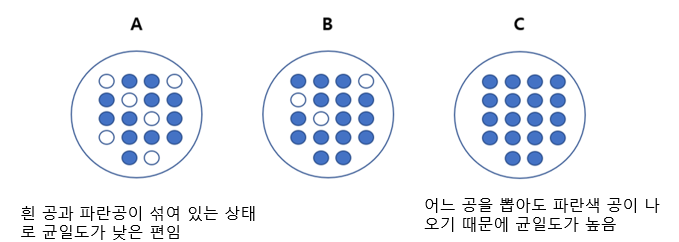
    <br>
    - 결정 노드는 정보 균일도가 높은 세트를 먼저 선택할 수 있도록 조건을 만들어야 함

### 4. 균일도 측정 
- 엔트로피를 이용한 정보 이득
- 지니 계수
    - 원래는 경제학에서 불평등 지수를 나타낼 때 사용하는 계수
    - 0 이 가장 평등, 1로 갈수록 불평등

## 붓꽃(Iris) 품종 예측

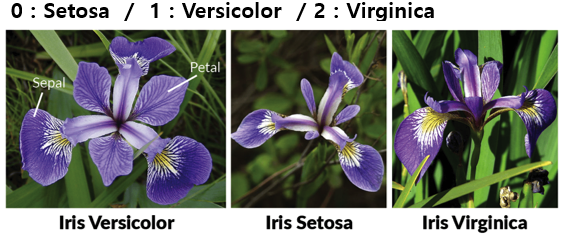

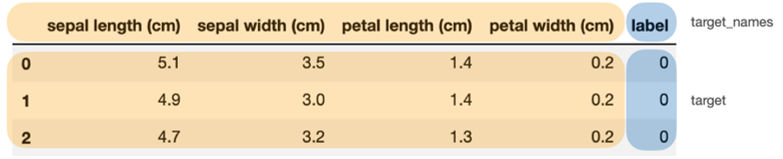

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()

In [3]:
import pandas as pd

In [4]:
iris_df = pd.DataFrame(data = iris.data, columns=iris.feature_names)

In [5]:
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [6]:
iris_df['label'] = iris.target

In [7]:
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   label  
0      0  
1      0  
2      0  
3      0  
4      0

In [8]:
iris_df['label'].unique()

array([0, 1, 2])

In [9]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [10]:
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=156)

In [12]:
dt_clf = DecisionTreeClassifier(random_state=156)

In [13]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [14]:
y_pred = dt_clf.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score # score() 과 같은 함수

print("정확도 : {0:.4f}".format(accuracy_score(y_test, y_pred))) 

정확도 : 0.9667


### 결정 트리 모델 시각화

**1. graphviz 다운로드**

https://graphviz.gitlab.io/download/

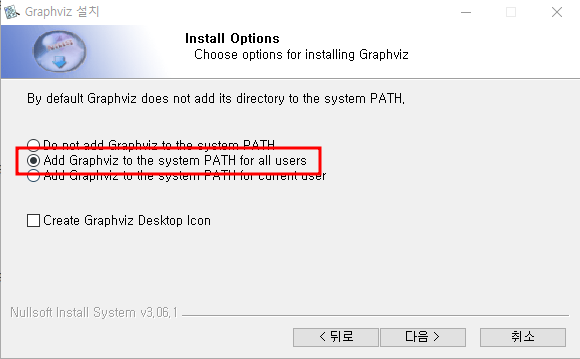

**2. graphviz 라이브러리 설치**

In [16]:
# !pip install graphviz

**3. 주피터 서버 재실행**

***
#### 시각화

In [19]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris.target_names, feature_names=iris.feature_names, 
                impurity=True, filled=True, rounded=True)

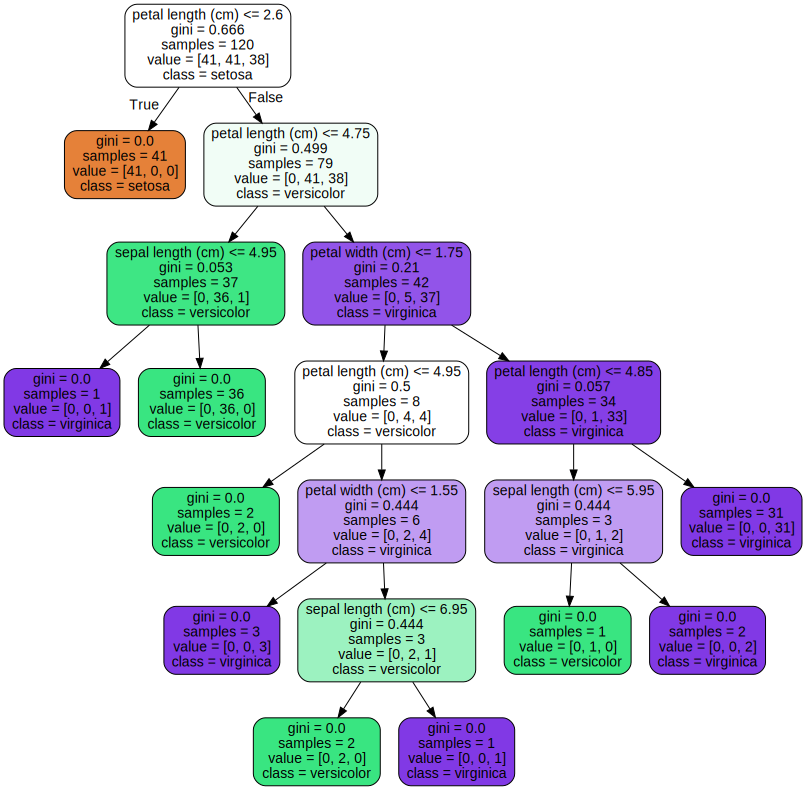

In [21]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)